# Applied Machine Learning Project
## Pover-T Tests: Predicting Poverty (by World Bank) - DrivenData Competition

### Libraries

In [0]:
import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.mixture import BayesianGaussianMixture
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

### Load Data

In [0]:
# Parameter to read files from google drive (True) or locally (False)
use_drive = False


# List of Google Drive IDs associated with each file
drive_id = {}
drive_id["A_hhold_test"]  = "1DCstFSLzafiC24rq7fPnJAVMVYhpnMx2"
drive_id["A_hhold_train"] = "1U8CaodAP7kjZzjWAxKM6bvAmhUYLG2KD"
drive_id["A_indiv_test"]  = "1F7oCJox5IzhItBn9Qht_t8D_CPzOu4jK"
drive_id["A_indiv_train"] = "19wULOfDfS942voLWG1lEtVyCEIjCDZnW"

drive_id["B_hhold_test"]  = "1hd-1yGrbQvdT1QKze-CWbRPaCu-s2cpE"
drive_id["B_hhold_train"] = "1VxqzGvBvwVccL37p50ryRdReZfQPFIUi"
drive_id["B_indiv_test"]  = "1uF0IlRmfN8m4Ns0MR6ljZNZyboV-2QlD"
drive_id["B_indiv_train"] = "1UBySanMseB_sYmsGuJipJGV-JRSivl5W"

drive_id["C_hhold_test"]  = "1JQr_ZrvCZu82WjXfvwwtlY640vWvl2Ze"
drive_id["C_hhold_train"] = "1Or6AMyFY69OcNC5yw27YVYligL-ZB3KV"
drive_id["C_indiv_test"]  = "1BBR7qYASigCIgElRPUu48NCfcS__W5GS"
drive_id["C_indiv_train"] = "1Lz8j0u7bTQG06WYhq3aeTD4zTSxR7lg0"


# Function that returns either the google drive download link or csv name file (locally)
def get_csv_path(nom):
    if use_drive:
        return "https://drive.google.com/uc?id=" + drive_id[nom] + "&export=download"
    else:
        return nom + ".csv"

In [0]:
A_hhold_train = pd.read_csv(get_csv_path('A_hhold_train'), index_col='id')
B_hhold_train = pd.read_csv(get_csv_path('B_hhold_train'), index_col='id')
C_hhold_train = pd.read_csv(get_csv_path('C_hhold_train'), index_col='id')

A_indiv_train = pd.read_csv(get_csv_path('A_indiv_train'), index_col=['id','iid'])
B_indiv_train = pd.read_csv(get_csv_path('B_indiv_train'), index_col=['id','iid'])
C_indiv_train = pd.read_csv(get_csv_path('C_indiv_train'), index_col=['id','iid'])

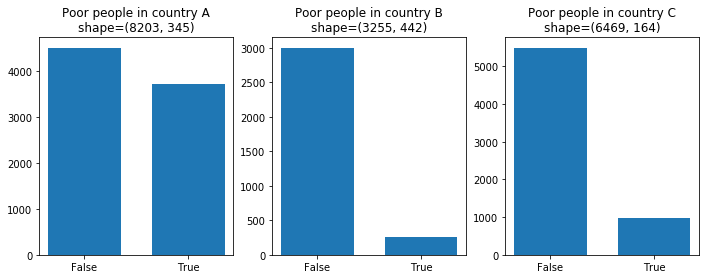

In [0]:
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 4, 1)
sdata = A_hhold_train.poor.value_counts()
ax.bar(sdata.index, height=sdata, width=0.7, tick_label=sdata.index)
ax.set_title('Poor people in country A' + '\n' + 'shape=' + str(A_hhold_train.shape))

ax = fig.add_subplot(1, 4, 2)
sdata = B_hhold_train.poor.value_counts()
ax.bar(sdata.index, height=sdata, width=0.7, tick_label=sdata.index)
ax.set_title('Poor people in country B' + '\n' + 'shape=' + str(B_hhold_train.shape))

ax = fig.add_subplot(1, 4, 3)
sdata = C_hhold_train.poor.value_counts()
ax.bar(sdata.index, height=sdata, width=0.7, tick_label=sdata.index)
ax.set_title('Poor people in country C' + '\n' + 'shape=' + str(C_hhold_train.shape))

plt.show()

In [0]:
A_hhold_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [0]:
A_indiv_train.head()

HeUgMnzF CaukPfUC MzEtIdUF gtnNTNam SWoXNmPc eXbOkwhI  OdXpbPGJ  \
id    iid                                                                   
80389 1      XJsPz    mOlYV    UFoKR    SSvEP    onRNG    YXCNt       4.0   
      2      XJsPz    mOlYV    axSTs    CXizI    onRNG    YXCNt       4.0   
      3      TRFeI    mOlYV    axSTs    CXizI    NDnCs    YXCNt       4.0   
      4      XJsPz    yAyAe    FRcdT    CXizI    onRNG    YXCNt       NaN   
39883 1      XJsPz    mOlYV    UFoKR    HIvIU    onRNG    YXCNt       4.0   

          XONDGWjH KsFoQcUV qYRZCuJD   ...   ukWqmeSS qqVibbSA MgCoFhXK  \
id    iid                              ...                                
80389 1      oArAw    kpkiH    fohru   ...        181    QQdHS    uEstx   
      2      ccbZA    HgfUG    fohru   ...        141    QQdHS    uEstx   
      3      fOUHD    HgfUG    oEref   ...         41    QQdHS    gCSRj   
      4      fOUHD    HgfUG    fohru   ...         16    QQdHS    uEstx   
39883 1      oArAw    kpkiH    fohru   ...        381    QQdHS    uEstx   

          rFpoTXAq RXcLsVAQ rQWIpTiG XizJGmbu xqUooaNJ   poor country  
id    iid                                                              
80389 1      Hikoa    zQvdC    xUYIC    juMSt    dSJoN   True       A  
      2      Hikoa    zQvdC    xUYIC    juMSt    JTCKs   True       A  
      3      Hikoa    zQvdC    rkLqZ    juMSt    JTCKs   True       A  
      4      Hikoa    zQvdC    jVHyH    GtHel    JTCKs   True       A  
39883 1      Hikoa    zQvdC    xUYIC    juMSt    UaIsy  False       A  

[5 rows x 42 columns]

### Model Training

#### Data Pre-process

In [0]:
def drop_useless_col(df):
    for col in list(df):
        ini = -1
        dif = False
        if col != "country":
            for row in list(df.index):
                if ini == -1:
                    ini = row
                else:
                    if (df.loc[row][col] != df.loc[ini][col]):
                        dif = True
                        break
        if not dif:
            df.drop(col, axis=1, inplace=True)
    return df


def standardize_numeric(df):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    return df


def pre_process_hhold(df):
    df = standardize_numeric(df)
    df = pd.get_dummies(df)
    df.fillna(0, inplace=True)
    return df


def pre_process_indiv(df):
    df = drop_useless_col(df)
    
    df_num = df.select_dtypes(include=['int64', 'float64'])    
    df_num = df_num.groupby(['id']).sum().div(df_num.groupby(['id']).count(), axis='columns')
    df_num = standardize_numeric(df_num)
    df_num.fillna(0, inplace=True)
    
    df_txt = df.drop(list(df_num), axis=1)
    df_txt = pd.get_dummies(df_txt)
    df_txt = df_txt.groupby(['id']).sum().div(df_txt.groupby(['id']).count(), axis='columns')
    
    df = pd.concat([df_num, df_txt], axis=1)
    df = df.add_suffix('_indiv')
    return df


def pre_process_data_merge(df_hhold, df_indiv, match_cols=None):
    print("")
    print("Input:          {} , {}".format(df_hhold.shape,df_indiv.shape))
    
    df_hhold = pre_process_hhold(df_hhold)
    df_indiv = pre_process_indiv(df_indiv)
    
    print("Before merge:   {} , {}".format(df_hhold.shape,df_indiv.shape))
    
    df = pd.concat([df_hhold,df_indiv], axis=1)
    
    # match test set and training set columns
    if match_cols is not None:
        to_drop = np.setdiff1d(df.columns, match_cols)
        to_add = np.setdiff1d(match_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    print("Output:         {}".format(df.shape))
    
    return df


def pre_process_data(df, match_cols=None):
    print("")
    print("Input shape:\t{}".format(df.shape))

    df = pre_process_hhold(df)
    print("After pre-process:\t{}".format(df.shape))

    # match test set and training set columns
    if match_cols is not None:
        to_drop = np.setdiff1d(df.columns, match_cols)
        to_add = np.setdiff1d(match_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    return df

In [0]:
XA_train_all_df = pre_process_data_merge(A_hhold_train.drop('poor', axis=1), A_indiv_train.drop('poor', axis=1)).sort_index()
XB_train_all_df = pre_process_data_merge(B_hhold_train.drop('poor', axis=1), B_indiv_train.drop('poor', axis=1)).sort_index()
XC_train_all_df = pre_process_data_merge(C_hhold_train.drop('poor', axis=1), C_indiv_train.drop('poor', axis=1)).sort_index()

XA_train_all  = XA_train_all_df.values
XB_train_all  = XB_train_all_df.values
XC_train_all  = XC_train_all_df.values

YA_train_all_df = A_hhold_train['poor'].sort_index()
YB_train_all_df = B_hhold_train['poor'].sort_index()
YC_train_all_df = C_hhold_train['poor'].sort_index()

YA_train_all = np.ravel(YA_train_all_df)*1
YB_train_all = np.ravel(YB_train_all_df)*1
YC_train_all = np.ravel(YC_train_all_df)*1


Input:          (8203, 344) , (37560, 41)
Before merge:   (8203, 859) , (8203, 273)
Output:         (8203, 1132)

Input:          (3255, 441) , (20252, 224)
Before merge:   (3255, 1432) , (3255, 1640)
Output:         (3255, 3072)

Input:          (6469, 163) , (29913, 41)
Before merge:   (6469, 795) , (6469, 299)
Output:         (6469, 1094)


#### Grid Search

In [0]:
def jo_cross_validation(X_train_all, Y_train_all, subsample=[1.0]):
    print("Cross validation")
    
    cv_result = []
    cv_params = []
    cv_scores = []
    
    tini = time.time()
    for sub in subsample:
        print()
        print("{:6.2f} [m]   ||".format((time.time()-tini)/60.0)
              +" "+"subsample: {:4.2f}".format(sub))
        
        if sub >= 1:
            X_train = X_train_all
            Y_train = Y_train_all
        else:
            X_train, _, Y_train, _ = train_test_split(X_train_all, Y_train_all, test_size=(1-sub), random_state=22)
        
        param_set = {}

        param_opt = {}

        param_lst = []
        param_lst.append({'learning_rate':[0.1,0.2], 'n_estimators':range(20,156,15)})
        param_lst.append({'max_depth':range(5,16,2)})
        param_lst.append({'min_samples_split':range(600,2001,200), 'min_samples_leaf':range(30,81,10)})
        param_lst.append({'max_features':range(20,201,5)})
        #param_lst.append({'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9]})

        for i in range(len(param_lst)):
            print("{:6.2f} [m]   ||".format((time.time()-tini)/60.0)
                  +"    "+"GridSearch")
            
            grd_search = GridSearchCV(estimator=GradientBoostingClassifier(
                                                    **param_opt,
                                                    **param_set,
                                                    random_state=22,
                                                    verbose=0
                                                ),
                                      param_grid = param_lst[i],
                                      scoring = 'roc_auc', # 'neg_log_loss' 'roc_auc'
                                      n_jobs = 32,
                                      iid = False,
                                      cv = 3,
                                      verbose=1
                                     )

            grd_search.fit(X_train, Y_train)
            
            cv_result.append(grd_search.cv_results_)
            cv_params.append(grd_search.best_params_)
            cv_scores.append(grd_search.best_score_)

            param_opt = {**param_opt, **grd_search.best_params_}
            
            print("{:6.2f} [m]   ||".format((time.time()-tini)/60.0)
                  +"        "+"score: {:15.13f}".format(grd_search.best_score_),"  ->  ",grd_search.best_params_)
              
    if True:
        print()
        print()
        print()
        print("Detailed results")
        print()
        print()
        for cv in range(len(cv_result)):
            print("----------------------------------------------------------------------------------------------------")
            for i in range(len(cv_result[cv]['params'])):
                print(cv_result[cv]['params'][i],"  #  ",
                      cv_result[cv]['mean_test_score'][i],"  #  ",
                      cv_result[cv]['mean_fit_time'][i])
            print()
            print(cv_scores[cv],"  #  ",cv_params[cv])

In [0]:
jo_cross_validation(XA_train_all, YA_train_all, subsample=[1.0,0.9,0.8,0.6,0.5])

Cross validation

  0.00 [m]   || subsample: 1.00
  0.00 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  2.6min remaining:    5.3s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.7min finished


  3.38 [m]   ||        score: 0.9477042226145   ->   {'learning_rate': 0.2, 'n_estimators': 140}
  3.38 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  4.5min remaining:  2.3min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  5.2min finished


 10.38 [m]   ||        score: 0.9448142993064   ->   {'max_depth': 5}
 10.38 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed: 11.4min finished


 22.63 [m]   ||        score: 0.9502408442458   ->   {'min_samples_leaf': 60, 'min_samples_split': 2000}
 22.63 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   57.5s finished


 23.69 [m]   ||        score: 0.9512777329393   ->   {'max_features': 105}

 23.69 [m]   || subsample: 0.90
 23.69 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  2.4min remaining:    4.8s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.4min finished


 27.31 [m]   ||        score: 0.9491051130466   ->   {'learning_rate': 0.2, 'n_estimators': 155}
 27.31 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  3.8min remaining:  1.9min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  4.8min finished


 35.71 [m]   ||        score: 0.9467062495376   ->   {'max_depth': 7}
 35.71 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed: 13.0min finished


 50.36 [m]   ||        score: 0.9522168539302   ->   {'min_samples_leaf': 60, 'min_samples_split': 2000}
 50.36 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   59.5s finished


 51.60 [m]   ||        score: 0.9530003794025   ->   {'max_features': 115}

 51.60 [m]   || subsample: 0.80
 51.60 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  2.1min remaining:    4.2s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.2min finished


 54.61 [m]   ||        score: 0.9464562868111   ->   {'learning_rate': 0.2, 'n_estimators': 125}
 54.61 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  3.1min remaining:  1.5min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  3.5min finished


 60.67 [m]   ||        score: 0.9440976205886   ->   {'max_depth': 7}
 60.67 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  8.7min finished


 70.28 [m]   ||        score: 0.9516353678250   ->   {'min_samples_leaf': 80, 'min_samples_split': 2000}
 70.28 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   42.0s finished


 71.13 [m]   ||        score: 0.9514317208173   ->   {'max_features': 155}

 71.13 [m]   || subsample: 0.60
 71.14 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.5min remaining:    3.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.5min finished


 73.28 [m]   ||        score: 0.9409110341570   ->   {'learning_rate': 0.1, 'n_estimators': 155}
 73.28 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  2.9min remaining:  1.5min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  3.7min finished


 78.22 [m]   ||        score: 0.9386076439575   ->   {'max_depth': 5}
 78.22 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  5.5min finished


 84.56 [m]   ||        score: 0.9462970730113   ->   {'min_samples_leaf': 50, 'min_samples_split': 1200}
 84.56 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   37.4s finished


 85.32 [m]   ||        score: 0.9462983946522   ->   {'max_features': 120}

 85.32 [m]   || subsample: 0.50
 85.32 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.2min remaining:    2.4s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.3min finished


 87.04 [m]   ||        score: 0.9378208173195   ->   {'learning_rate': 0.1, 'n_estimators': 155}
 87.04 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  2.5min finished


 90.43 [m]   ||        score: 0.9372623108923   ->   {'max_depth': 5}
 90.43 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  4.0min finished


 94.99 [m]   ||        score: 0.9445452059133   ->   {'min_samples_leaf': 60, 'min_samples_split': 1200}
 94.99 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   30.7s finished


 95.57 [m]   ||        score: 0.9449432137151   ->   {'max_features': 110}



Detailed results


----------------------------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 20}   #   0.912499326913   #   10.9194201628
{'learning_rate': 0.1, 'n_estimators': 35}   #   0.925761689673   #   23.7960196336
{'learning_rate': 0.1, 'n_estimators': 50}   #   0.933876024413   #   41.1277101835
{'learning_rate': 0.1, 'n_estimators': 65}   #   0.938333780697   #   48.0900544326
{'learning_rate': 0.1, 'n_estimators': 80}   #   0.941116489537   #   69.3873213132
{'learning_rate': 0.1, 'n_estimators': 95}   #   0.942882804714   #   75.7258176009
{'learning_rate': 0.1, 'n_estimators': 110}   #   0.944259315933   #   90.7723905245
{'learning_rate': 0.1, 'n_estimators': 125}   #   0.945198704278   #   95.9475339254
{'learning_rate': 0.1, 'n_estimators': 140}   #   0.946061590518   #   107.466411034
{'learning_rate': 0.1, 'n_estimators': 155}

{'min_samples_leaf': 80, 'min_samples_split': 2000}   #   0.952067351108   #   100.211248318

0.95221685393   #   {'min_samples_leaf': 60, 'min_samples_split': 2000}
----------------------------------------------------------------------------------------------------
{'max_features': 20}   #   0.951561686591   #   1.83552845319
{'max_features': 25}   #   0.951410368122   #   2.17068600655
{'max_features': 30}   #   0.951079315281   #   2.29333559672
{'max_features': 35}   #   0.951174532495   #   2.65006200473
{'max_features': 40}   #   0.951757738307   #   3.17053627968
{'max_features': 45}   #   0.950408979697   #   3.35881837209
{'max_features': 50}   #   0.95296750755   #   3.70594747861
{'max_features': 55}   #   0.952265484528   #   4.10333808263
{'max_features': 60}   #   0.951626312697   #   4.96871630351
{'max_features': 65}   #   0.952376548973   #   6.44256957372
{'max_features': 70}   #   0.95254141306   #   7.59985566139
{'max_features': 75}   #   0.951833101388   #   9.210

In [0]:
jo_cross_validation(XB_train_all, YB_train_all, subsample=[1.0,0.9,0.8,0.6,0.5])

Cross validation

  0.00 [m]   || subsample: 1.00
  0.00 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  2.6min remaining:    5.2s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.6min finished


  3.26 [m]   ||        score: 0.8025931490727   ->   {'learning_rate': 0.1, 'n_estimators': 155}
  3.26 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  4.9min remaining:  2.5min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  5.5min finished


 10.14 [m]   ||        score: 0.7919920096943   ->   {'max_depth': 5}
 10.14 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  8.3min finished


 19.19 [m]   ||        score: 0.8351099363833   ->   {'min_samples_leaf': 70, 'min_samples_split': 1200}
 19.19 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   31.3s finished


 19.74 [m]   ||        score: 0.8521935158400   ->   {'max_features': 25}

 19.74 [m]   || subsample: 0.90
 19.74 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  2.2min remaining:    4.5s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.3min finished


 23.44 [m]   ||        score: 0.8033180728538   ->   {'learning_rate': 0.1, 'n_estimators': 155}
 23.44 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  3.7min remaining:  1.9min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  4.4min finished


 29.97 [m]   ||        score: 0.7914969461268   ->   {'max_depth': 5}
 29.97 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  6.4min finished


 37.59 [m]   ||        score: 0.8323720516390   ->   {'min_samples_leaf': 80, 'min_samples_split': 1400}
 37.59 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   26.3s finished


 38.06 [m]   ||        score: 0.8419878709129   ->   {'max_features': 35}

 38.06 [m]   || subsample: 0.80
 38.07 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  2.0min remaining:    4.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.0min finished


 41.23 [m]   ||        score: 0.7984306905739   ->   {'learning_rate': 0.1, 'n_estimators': 155}
 41.23 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  3.1min remaining:  1.5min
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  3.5min finished


 46.70 [m]   ||        score: 0.7906118079702   ->   {'max_depth': 5}
 46.70 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  4.7min finished


 52.36 [m]   ||        score: 0.8299463410080   ->   {'min_samples_leaf': 70, 'min_samples_split': 1400}
 52.36 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   24.1s finished


 52.82 [m]   ||        score: 0.8356964488031   ->   {'max_features': 105}

 52.82 [m]   || subsample: 0.60
 52.82 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.4min remaining:    2.9s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.5min finished


 54.90 [m]   ||        score: 0.7935076288974   ->   {'learning_rate': 0.1, 'n_estimators': 140}
 54.90 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:  1.9min remaining:   56.5s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  2.0min finished


 58.00 [m]   ||        score: 0.7767569417710   ->   {'max_depth': 5}
 58.00 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  1.9min finished


 60.42 [m]   ||        score: 0.8342906948840   ->   {'min_samples_leaf': 80, 'min_samples_split': 1200}
 60.42 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   20.0s finished


 60.79 [m]   ||        score: 0.8479783356715   ->   {'max_features': 130}

 60.79 [m]   || subsample: 0.50
 60.80 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.2min remaining:    2.3s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.2min finished


 62.53 [m]   ||        score: 0.8084924311524   ->   {'learning_rate': 0.2, 'n_estimators': 155}
 62.53 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:   51.9s remaining:   25.9s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  1.1min finished


 64.81 [m]   ||        score: 0.7950656780523   ->   {'max_depth': 7}
 64.81 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  1.3min finished


 66.51 [m]   ||        score: 0.8310440238173   ->   {'min_samples_leaf': 50, 'min_samples_split': 1000}
 66.51 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   18.0s finished


 66.83 [m]   ||        score: 0.8453995343955   ->   {'max_features': 35}



Detailed results


----------------------------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 20}   #   0.772358401498   #   11.0797514121
{'learning_rate': 0.1, 'n_estimators': 35}   #   0.784719708898   #   26.4594553312
{'learning_rate': 0.1, 'n_estimators': 50}   #   0.787431491344   #   35.6674644947
{'learning_rate': 0.1, 'n_estimators': 65}   #   0.793175320991   #   47.5009550254
{'learning_rate': 0.1, 'n_estimators': 80}   #   0.796080089211   #   61.5932816664
{'learning_rate': 0.1, 'n_estimators': 95}   #   0.794004708822   #   81.5111758709
{'learning_rate': 0.1, 'n_estimators': 110}   #   0.798762736325   #   87.4190901915
{'learning_rate': 0.1, 'n_estimators': 125}   #   0.798987515211   #   98.0720264912
{'learning_rate': 0.1, 'n_estimators': 140}   #   0.801559197488   #   108.745819092
{'learning_rate': 0.1, 'n_estimators': 155} 

0.841987870913   #   {'max_features': 35}
----------------------------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 20}   #   0.786363065753   #   7.51721127828
{'learning_rate': 0.1, 'n_estimators': 35}   #   0.785647949236   #   16.9114193122
{'learning_rate': 0.1, 'n_estimators': 50}   #   0.789236749919   #   26.524425745
{'learning_rate': 0.1, 'n_estimators': 65}   #   0.790153227017   #   36.7721063296
{'learning_rate': 0.1, 'n_estimators': 80}   #   0.793609139991   #   51.4926363627
{'learning_rate': 0.1, 'n_estimators': 95}   #   0.792368117253   #   57.4449706078
{'learning_rate': 0.1, 'n_estimators': 110}   #   0.793343655347   #   69.0033502579
{'learning_rate': 0.1, 'n_estimators': 125}   #   0.79509311726   #   73.0467600822
{'learning_rate': 0.1, 'n_estimators': 140}   #   0.79588681671   #   83.6416199207
{'learning_rate': 0.1, 'n_estimators': 155}   #   0.798430690574   #   86.3777000109
{'learning_rate'

In [0]:
jo_cross_validation(XC_train_all, YC_train_all, subsample=[1.0,0.9,0.8,0.6,0.5])

Cross validation

  0.00 [m]   || subsample: 1.00
  0.00 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.9min remaining:    3.8s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.9min finished


  2.19 [m]   ||        score: 0.9982474364504   ->   {'learning_rate': 0.1, 'n_estimators': 80}
  2.19 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:   55.1s remaining:   27.5s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:  1.1min finished


  3.78 [m]   ||        score: 0.9979177172451   ->   {'max_depth': 5}
  3.78 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  4.6min finished


  8.84 [m]   ||        score: 0.9990519721846   ->   {'min_samples_leaf': 50, 'min_samples_split': 800}
  8.84 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   36.5s finished


  9.54 [m]   ||        score: 0.9981855369907   ->   {'max_features': 200}

  9.54 [m]   || subsample: 0.90
  9.55 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.7min remaining:    3.4s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.7min finished


 11.50 [m]   ||        score: 0.9986105683244   ->   {'learning_rate': 0.1, 'n_estimators': 50}
 11.50 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:   36.7s remaining:   18.3s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:   44.2s finished


 12.70 [m]   ||        score: 0.9984077572390   ->   {'max_depth': 5}
 12.70 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  2.6min finished


 15.70 [m]   ||        score: 0.9994454859417   ->   {'min_samples_leaf': 60, 'min_samples_split': 600}
 15.70 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   26.1s finished


 16.25 [m]   ||        score: 0.9980315375302   ->   {'max_features': 200}

 16.25 [m]   || subsample: 0.80
 16.25 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:  1.4min remaining:    2.8s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.4min finished


 18.22 [m]   ||        score: 0.9975359696735   ->   {'learning_rate': 0.1, 'n_estimators': 140}
 18.22 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:   42.9s remaining:   21.4s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:   46.6s finished


 20.12 [m]   ||        score: 0.9968062376152   ->   {'max_depth': 5}
 20.12 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  6.1min finished


 27.19 [m]   ||        score: 0.9992650986474   ->   {'min_samples_leaf': 80, 'min_samples_split': 600}
 27.19 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   43.9s finished


 28.09 [m]   ||        score: 0.9989058326872   ->   {'max_features': 190}

 28.09 [m]   || subsample: 0.60
 28.09 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:   57.6s remaining:    1.9s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.0min finished


 29.51 [m]   ||        score: 0.9982505816778   ->   {'learning_rate': 0.1, 'n_estimators': 155}
 29.51 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:   29.0s remaining:   14.4s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:   31.1s finished


 30.57 [m]   ||        score: 0.9974958820286   ->   {'max_depth': 5}
 30.57 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  4.3min finished


 35.53 [m]   ||        score: 0.9988095874829   ->   {'min_samples_leaf': 80, 'min_samples_split': 600}
 35.53 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   34.6s finished


 36.21 [m]   ||        score: 0.9987456593840   ->   {'max_features': 160}

 36.21 [m]   || subsample: 0.50
 36.21 [m]   ||    GridSearch
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:   46.2s remaining:    1.5s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:   47.1s finished


 37.31 [m]   ||        score: 0.9963744665070   ->   {'learning_rate': 0.1, 'n_estimators': 155}
 37.31 [m]   ||    GridSearch
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=32)]: Done  12 out of  18 | elapsed:   21.8s remaining:   10.8s
[Parallel(n_jobs=32)]: Done  18 out of  18 | elapsed:   24.6s finished


 37.98 [m]   ||        score: 0.9954054212133   ->   {'max_depth': 7}
 37.98 [m]   ||    GridSearch
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=32)]: Done 144 out of 144 | elapsed:  3.5min finished


 42.00 [m]   ||        score: 0.9987759289947   ->   {'min_samples_leaf': 80, 'min_samples_split': 600}
 42.00 [m]   ||    GridSearch
Fitting 3 folds for each of 37 candidates, totalling 111 fits


[Parallel(n_jobs=32)]: Done 111 out of 111 | elapsed:   31.2s finished


 42.64 [m]   ||        score: 0.9989285800614   ->   {'max_features': 185}



Detailed results


----------------------------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 20}   #   0.996554393872   #   6.11869200071
{'learning_rate': 0.1, 'n_estimators': 35}   #   0.997551194964   #   14.6966670354
{'learning_rate': 0.1, 'n_estimators': 50}   #   0.99778422985   #   24.6548077265
{'learning_rate': 0.1, 'n_estimators': 65}   #   0.998018127835   #   35.3121554057
{'learning_rate': 0.1, 'n_estimators': 80}   #   0.99824743645   #   43.0422108968
{'learning_rate': 0.1, 'n_estimators': 95}   #   0.99823222207   #   56.3651657899
{'learning_rate': 0.1, 'n_estimators': 110}   #   0.998062345437   #   62.3567518393
{'learning_rate': 0.1, 'n_estimators': 125}   #   0.997844185394   #   67.7369024754
{'learning_rate': 0.1, 'n_estimators': 140}   #   0.997937370665   #   79.3504625956
{'learning_rate': 0.1, 'n_estimators': 155}   

{'max_features': 85}   #   0.996032101977   #   2.03210639954
{'max_features': 90}   #   0.996060281539   #   2.25211326281
{'max_features': 95}   #   0.995732055661   #   2.5249830087
{'max_features': 100}   #   0.996119918176   #   2.61354200045
{'max_features': 105}   #   0.995736951959   #   3.06503335635
{'max_features': 110}   #   0.996463081994   #   3.25283273061
{'max_features': 115}   #   0.996568373563   #   3.5103495121
{'max_features': 120}   #   0.99634816464   #   3.9329577287
{'max_features': 125}   #   0.996438370252   #   4.41663400332
{'max_features': 130}   #   0.996995810577   #   4.72201800346
{'max_features': 135}   #   0.996418444384   #   4.96085365613
{'max_features': 140}   #   0.996880023919   #   5.14131522179
{'max_features': 145}   #   0.996842157486   #   5.29342341423
{'max_features': 150}   #   0.996787001291   #   5.71705651283
{'max_features': 155}   #   0.997746060287   #   6.73728124301
{'max_features': 160}   #   0.996535067454   #   6.24709947904

#### 2nd Grid Search

In [0]:
def jo_cross_validation_2(X_train_all, Y_train_all, sub, model_param, lr, ne, n):
    print("2nd Cross Validation")
    
    cv_result = []
    cv_params = []
    cv_scores = []
    
    tini = time.time()
    
    if sub >= 1:
        X_train = X_train_all
        Y_train = Y_train_all
    else:
        X_train, _, Y_train, _ = train_test_split(X_train_all, Y_train_all, test_size=(1-sub), random_state=22)
    
    llr = []
    lne = []
    clr = lr
    cne = ne
    for k in range(n):
        llr.append(clr)
        lne.append(cne)
        
        clr = clr/2.0
        cne = cne*2
    
    param_tst = {'learning_rate':llr, 'n_estimators':lne}
    
    grd_search = GridSearchCV(estimator=GradientBoostingClassifier(
                                            **model_param,
                                            random_state=22,
                                            verbose=0
                                        ),
                              param_grid = param_tst,
                              scoring = 'roc_auc', # 'neg_log_loss' 'roc_auc'
                              n_jobs = 6,
                              iid = False,
                              cv = 3,
                              verbose=1
                             )

    grd_search.fit(X_train, Y_train)

    cv_result.append(grd_search.cv_results_)
    cv_params.append(grd_search.best_params_)
    cv_scores.append(grd_search.best_score_)

    print("{:6.2f} [m]   ||".format((time.time()-tini)/60.0)
                  +"        "+"score: {:15.13f}".format(grd_search.best_score_),"  ->  ",grd_search.best_params_)

    if True:
        print()
        print()
        print()
        print("Detailed results")
        print()
        print()
        for cv in range(len(cv_result)):
            print("----------------------------------------------------------------------------------------------------")
            for i in range(len(cv_result[cv]['params'])):
                print(cv_result[cv]['params'][i],"  #  ",
                      cv_result[cv]['mean_test_score'][i],"  #  ",
                      cv_result[cv]['mean_fit_time'][i])
            print()
            print(cv_scores[cv],"  #  ",cv_params[cv])

In [0]:
paramA_gs = {'max_depth': 7,
             'min_samples_split': 2000,
             'min_samples_leaf': 60,
             'max_features': 115}

paramB_gs = {'n_estimators': 155,
             'max_depth': 5,
             'min_samples_split': 1200,
             'min_samples_leaf': 70,
             'max_features': 25}

paramC_gs = {'max_depth': 5,
             'min_samples_split': 600,
             'min_samples_leaf': 60}

In [0]:
jo_cross_validation_2(XA_train_all, YA_train_all, 0.9, paramA_gs, 0.2, 155, 6)

2nd Cross Validation
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 15.4min
[Parallel(n_jobs=6)]: Done 108 out of 108 | elapsed: 48.0min finished


 52.87 [m]   ||        score: 0.9543955472573   ->   {'learning_rate': 0.00625, 'n_estimators': 4960}



Detailed results


----------------------------------------------------------------------------------------------------
{'learning_rate': 0.2, 'n_estimators': 155}   #   0.953000379403   #   13.938734134
{'learning_rate': 0.2, 'n_estimators': 310}   #   0.952448858621   #   29.8651107947
{'learning_rate': 0.2, 'n_estimators': 620}   #   0.950489091269   #   60.7634700934
{'learning_rate': 0.2, 'n_estimators': 1240}   #   0.948401904206   #   122.269606034
{'learning_rate': 0.2, 'n_estimators': 2480}   #   0.947440156029   #   267.515086095
{'learning_rate': 0.2, 'n_estimators': 4960}   #   0.946775286648   #   518.508080006
{'learning_rate': 0.1, 'n_estimators': 155}   #   0.95032140068   #   15.5833017826
{'learning_rate': 0.1, 'n_estimators': 310}   #   0.953358679384   #   32.6182743708
{'learning_rate': 0.1, 'n_estimators': 620}   #   0.952925422831   #   72.6306087971
{'learnin

In [0]:
jo_cross_validation_2(XB_train_all, YB_train_all, 1.0, paramB_gs, 0.1, 155, 6)

2nd Cross Validation
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 108 out of 108 | elapsed: 63.7min finished


 63.78 [m]   ||        score: 0.8534626328488   ->   {'learning_rate': 0.00625, 'n_estimators': 2480}



Detailed results


----------------------------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 155}   #   0.85219351584   #   2.03157583872
{'learning_rate': 0.1, 'n_estimators': 310}   #   0.849541550191   #   3.75667738914
{'learning_rate': 0.1, 'n_estimators': 620}   #   0.839968797634   #   6.09441232681
{'learning_rate': 0.1, 'n_estimators': 1240}   #   0.830656576025   #   10.8305490812
{'learning_rate': 0.1, 'n_estimators': 2480}   #   0.818662720659   #   20.5438553492
{'learning_rate': 0.1, 'n_estimators': 4960}   #   0.813010151614   #   31.5885639985
{'learning_rate': 0.05, 'n_estimators': 155}   #   0.837778712297   #   2.26171350479
{'learning_rate': 0.05, 'n_estimators': 310}   #   0.850487801436   #   3.32421763738
{'learning_rate': 0.05, 'n_estimators': 620}   #   0.850927354149   #   5.80381759008
{'lea

In [0]:
jo_cross_validation_2(XC_train_all, YC_train_all, 0.9, paramC_gs, 0.1, 50, 6)

2nd Cross Validation
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 16.9min
[Parallel(n_jobs=6)]: Done 108 out of 108 | elapsed: 119.2min finished


119.65 [m]   ||        score: 0.9994454859417   ->   {'learning_rate': 0.1, 'n_estimators': 50}



Detailed results


----------------------------------------------------------------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 50}   #   0.999445485942   #   34.6496404807
{'learning_rate': 0.1, 'n_estimators': 100}   #   0.999402414254   #   75.5816864173
{'learning_rate': 0.1, 'n_estimators': 200}   #   0.999389792893   #   152.514010191
{'learning_rate': 0.1, 'n_estimators': 400}   #   0.999411887323   #   168.648647706
{'learning_rate': 0.1, 'n_estimators': 800}   #   0.999411887323   #   169.152144353
{'learning_rate': 0.1, 'n_estimators': 1600}   #   0.999411887323   #   172.462187767
{'learning_rate': 0.05, 'n_estimators': 50}   #   0.999254455107   #   40.0612695217
{'learning_rate': 0.05, 'n_estimators': 100}   #   0.999400995173   #   79.1643881798
{'learning_rate': 0.05, 'n_estimators': 200}   #   0.999341682763   #   160.60716478
{'learning_rate

#### Training (with tunned parameters)

In [0]:
XA_train, _, YA_train, __ = train_test_split(XA_train_all, YA_train_all, test_size=0.1, random_state=22)

#XA_train = XA_train_all
#YA_train = YA_train_all

XB_train = XB_train_all
YB_train = YB_train_all

#XC_train = XC_train_all
#YC_train = YC_train_all

XC_train, _, YC_train, __ = train_test_split(XC_train_all, YC_train_all, test_size=0.1, random_state=22)

In [0]:
paramA = {'learning_rate': 0.00625,
          'n_estimators': 4960,
          'max_depth': 7,
          'min_samples_split': 2000,
          'min_samples_leaf': 60,
          'max_features': 115}

paramB = {'learning_rate': 0.00625,
          'n_estimators': 2480,
          'max_depth': 5,
          'min_samples_split': 1200,
          'min_samples_leaf': 70,
          'max_features': 25}

paramC = {'learning_rate': 0.1,
          'n_estimators': 50,
          'max_depth': 5,
          'min_samples_split': 600,
          'min_samples_leaf': 60}

In [0]:
modelA = GradientBoostingClassifier(**paramA,
                                    random_state=22,
                                    verbose=0)

modelB = GradientBoostingClassifier(**paramB,
                                    random_state=22,
                                    verbose=0)

modelC = GradientBoostingClassifier(**paramC,
                                    random_state=22,
                                    verbose=0)


print("Fitting modelA")
modelA.fit(XA_train,YA_train)

print("Fitting modelB")
modelB.fit(XB_train,YB_train)

print("Fitting modelC")
modelC.fit(XC_train,YC_train)

print("Done!")

Fitting modelA
Fitting modelB
Fitting modelC
Done!


### Predicting

#### Read Test Data

In [0]:
A_hhold_test = pd.read_csv(get_csv_path('A_hhold_test'), index_col='id')
B_hhold_test = pd.read_csv(get_csv_path('B_hhold_test'), index_col='id')
C_hhold_test = pd.read_csv(get_csv_path('C_hhold_test'), index_col='id')

A_indiv_test = pd.read_csv(get_csv_path('A_indiv_test'), index_col=['id','iid'])
B_indiv_test = pd.read_csv(get_csv_path('B_indiv_test'), index_col=['id','iid'])
C_indiv_test = pd.read_csv(get_csv_path('C_indiv_test'), index_col=['id','iid'])

#### Preprocess Test Data

In [0]:
XA_test_df = pre_process_data_merge(A_hhold_test, A_indiv_test, match_cols=XA_train_all_df.columns).sort_index()
XB_test_df = pre_process_data_merge(B_hhold_test, B_indiv_test, match_cols=XB_train_all_df.columns).sort_index()
XC_test_df = pre_process_data_merge(C_hhold_test, C_indiv_test, match_cols=XC_train_all_df.columns).sort_index()

XA_test_df = XA_test_df[XA_train_all_df.columns.tolist()]
XB_test_df = XB_test_df[XB_train_all_df.columns.tolist()]
XC_test_df = XC_test_df[XC_train_all_df.columns.tolist()]

XA_test = XA_test_df.values
XB_test = XB_test_df.values
XC_test = XC_test_df.values


Input:          (4041, 344) , (18535, 41)
Before merge:   (4041, 851) , (4041, 272)
Output:         (4041, 1132)

Input:          (1604, 441) , (10066, 224)
Before merge:   (1604, 1419) , (1604, 1533)
Output:         (1604, 3072)

Input:          (3187, 163) , (14701, 41)
Before merge:   (3187, 773) , (3187, 300)
Output:         (3187, 1094)


#### Prediction

In [0]:
predA = modelA.predict_proba(XA_test)
predB = modelB.predict_proba(XB_test)
predC = modelC.predict_proba(XC_test)

#### Create the Submission .csv file

In [0]:
def pred2df(predictions, features, country_code):
    country = pd.DataFrame(data=predictions[:, 1],columns=['poor'],index=features.index)
    country['country'] = country_code
    return country[['country','poor']]

def reorder_result_df(hhold_df, x_df):
    country = hhold_df.copy()
    country = country.drop(country.columns, axis=1)
    country['country'] = x_df['country']
    country['poor'] = x_df['poor']
    return country

In [0]:
countryA = reorder_result_df(A_hhold_test, pred2df(predA, XA_test_df, 'A'))
countryB = reorder_result_df(B_hhold_test, pred2df(predB, XB_test_df, 'B'))
countryC = reorder_result_df(C_hhold_test, pred2df(predC, XC_test_df, 'C'))
countries = pd.concat([countryA, countryB, countryC])

In [0]:
countries.head(200)

,country,poor
id,,
418,A,0.928446
41249,A,0.002125
16205,A,0.927930
97501,A,0.002929
67756,A,0.989158
17938,A,0.011703
19036,A,0.001082
61587,A,0.248149
57571,A,0.784761


In [0]:
countries.to_csv('AML_Poverty-T.csv')